<a href="https://colab.research.google.com/github/josel9393/STUDY/blob/master/Current_Isles_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive",timeout_ms=60000000)

!nvidia-smi
!mkdir "/content/drive/My Drive/MONAI"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fri Jul  7 00:47:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import cv2
import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import defaultdict
import copy
import random
import os
import shutil
from urllib.request import urlretrieve

import albumentations as A

from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

from torchvision.transforms import ToTensor
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader,TensorDataset,ConcatDataset,random_split,SubsetRandomSampler


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import KFold

from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights,EfficientNet_V2_M_Weights,efficientnet_v2_m,resnet18,ResNet18_Weights
from PIL import Image

import time

import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
)
import hashlib
import torchvision.transforms
from torchvision.models import resnet50, ResNet50_Weights

from torchvision.utils import make_grid
import zipfile
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

In [3]:
!pip install nilearn
!pip install monai
!pip install --upgrade monai
!pip install 'monai[all]'
import tempfile
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Any, Mapping, Hashable

import monai
from monai.config import print_config
from monai.utils import first
from monai.config import KeysCollection
from monai.data import Dataset, ArrayDataset, create_test_image_3d, DataLoader
from monai.transforms import (
    Transform,
    MapTransform,
    Randomizable,
    AddChannel,
    AddChanneld,
    Compose,
    LoadImage,
    LoadImaged,
    Lambda,
    Lambdad,
    RandSpatialCrop,
    RandSpatialCropd,
    ToTensor,
    ToTensord,
    Orientation,
    Rotate
)
print_config()


MONAI version: 1.2.0
Numpy version: 1.22.4
Pytorch version: 2.0.1+cu118
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: c33f1ba588ee00229a309000e888f9817b4f1934
MONAI __file__: /usr/local/lib/python3.10/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.3.0
Nibabel version: 5.1.0
scikit-image version: 0.19.3
Pillow version: 8.4.0
Tensorboard version: 2.12.3
gdown version: 4.6.6
TorchVision version: 0.15.2+cu118
tqdm version: 4.65.0
lmdb version: 1.4.1
psutil version: 5.9.5
pandas version: 1.5.3
einops version: 0.6.1
transformers version: 4.21.3
mlflow version: 2.4.1
pynrrd version: 1.0.0

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [4]:
from monai.networks.nets import AttentionUnet
from monai.optimizers import Novograd
from monai.losses import DiceLoss
from monai.networks.nets import AttentionUnet,UNet,SwinUNETR
from monai.losses import DiceLoss
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import monai.networks.nets as nets
from torch.optim.lr_scheduler import OneCycleLR,CosineAnnealingLR,ReduceLROnPlateau

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
def set_random_seeds(seed=3):
    random.seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

set_random_seeds()

#Importar


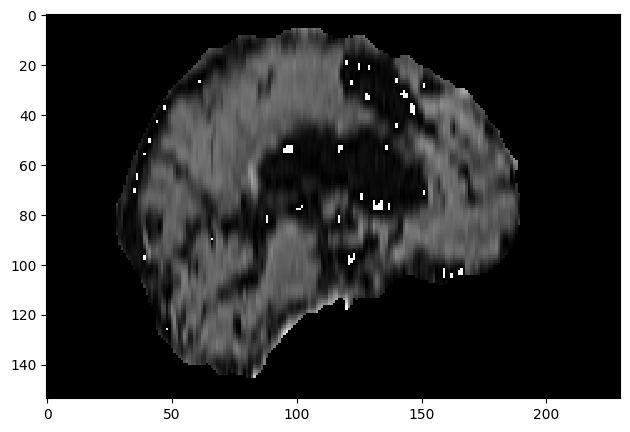

In [7]:
img=io.imread("/content/drive/MyDrive/A_brain/ISLES2015/Inputs/Sagital/27_110_sag.png")
io.imshow(img)
io.show()

#MASKS

In [8]:
import os
import torch
import random
from PIL import Image
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split


class SEGMENTATION(Dataset):
    def __init__(self, img_folder, mask_folder, transform=None):
        self.img_folder = img_folder
        self.mask_folder = mask_folder
        self.transform = transform
        self.img_files = sorted(os.listdir(self.img_folder))
        self.mask_files = sorted(os.listdir(self.mask_folder))
        self.augmented_images = 0
    def __len__(self):
        return len(self.img_files)

    def name(self,filename):
      return filename

    def __getitem__(self, index):
        img_path = os.path.join(self.img_folder, self.img_files[index])
        mask_path = os.path.join(self.mask_folder, self.mask_files[index])
        image = (io.imread(img_path, as_gray=True) / 65535).astype(np.float32)
        mask = (io.imread(mask_path, as_gray=True)/255).astype(np.float32)
        # mask = (mask > 0).astype(np.float32)

        nombre = self.name(self.img_files[index])

        if self.transform:
            augmented = self.transform(image=np.array(image), mask=np.array(mask))
            image, mask = augmented["image"], augmented["mask"]

        # # Convert mask to two-channel one-hot encoding
            mask_onehot = torch.zeros((mask.shape[0], mask.shape[1], 1), dtype=torch.float32)
            mask_onehot[..., 0] = (mask == 1)  # Background class
            # mask_onehot[..., 1] = (mask == 1)  # Foreground class
            return image, mask_onehot, nombre


# Define the transforms for data augmentation
train_transforms = A.Compose([
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomGamma(p=0.5),
    A.CLAHE(p=0.5),
    A.Transpose(p=0.5),
    # A.IAAAdditiveGaussianNoise(p=.5),
    A.OneOf([
        A.GaussNoise(var_limit=10, mean=0, p=0.5),
        A.Rotate(limit=45, border_mode=cv2.BORDER_CONSTANT)
    ], p=0.5),
    A.Resize(256, 256),
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # A.CenterCrop(224, 224),
    ToTensorV2()
])

val_transforms = A.Compose([
    A.Resize(256, 256),
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # A.CenterCrop(224, 224),
    ToTensorV2()
])

# img_folder ="/content/drive/MyDrive/A_brain/ISLES2015/Inputs/Axial"
# mask_folder = "/content/drive/MyDrive/A_brain/ISLES2015/Target/Axial"

# dataset = SEGMENTATION(
# img_folder = "/content/drive/MyDrive/A_brain/ISLES2015/Inputs/Axial",
# mask_folder = "/content/drive/MyDrive/A_brain/ISLES2015/Target/Axial",
# transform=None,
# )


img_folder ="/content/drive/MyDrive/A_brain/ISLES2015/JUST_MASK/AXI_INP"
mask_folder = "/content/drive/MyDrive/A_brain/ISLES2015/JUST_MASK/AXI_TAR"

dataset = SEGMENTATION(
img_folder ="/content/drive/MyDrive/A_brain/ISLES2015/JUST_MASK/AXI_INP",
mask_folder = "/content/drive/MyDrive/A_brain/ISLES2015/JUST_MASK/AXI_TAR",
transform=None,
)

dataset = SEGMENTATION(img_folder, mask_folder, transform=None)

# Create subsets for training, validation, and test
train_val_indices, test_indices = train_test_split(range(len(dataset)), test_size=0.2)
train_indices, val_indices = train_test_split(train_val_indices, test_size=0.2)

# Apply the transforms to the respective datasets
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

train_dataset.dataset.transform = train_transforms
val_dataset.dataset.transform = val_transforms
test_dataset.dataset.transform = val_transforms

# Define the dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

print(len(dataset.img_files))
print(len(dataset.mask_files))


1356
1356


In [9]:
print("Training dataset length:", len(train_dataset))
print("Validation dataset length:", len(val_dataset))
print("Test dataset length:", len(test_dataset))

Training dataset length: 867
Validation dataset length: 217
Test dataset length: 272


In [10]:
print(len(train_dataset.dataset.img_files))
print(len(train_dataset.dataset.mask_files))


print(len(val_dataset.dataset.img_files))
print(len(val_dataset.dataset.mask_files))

print(len(test_dataset.dataset.img_files))
print(len(test_dataset.dataset.mask_files))


1356
1356
1356
1356
1356
1356


In [32]:
print(len(dataset))
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

1356
55
14
272


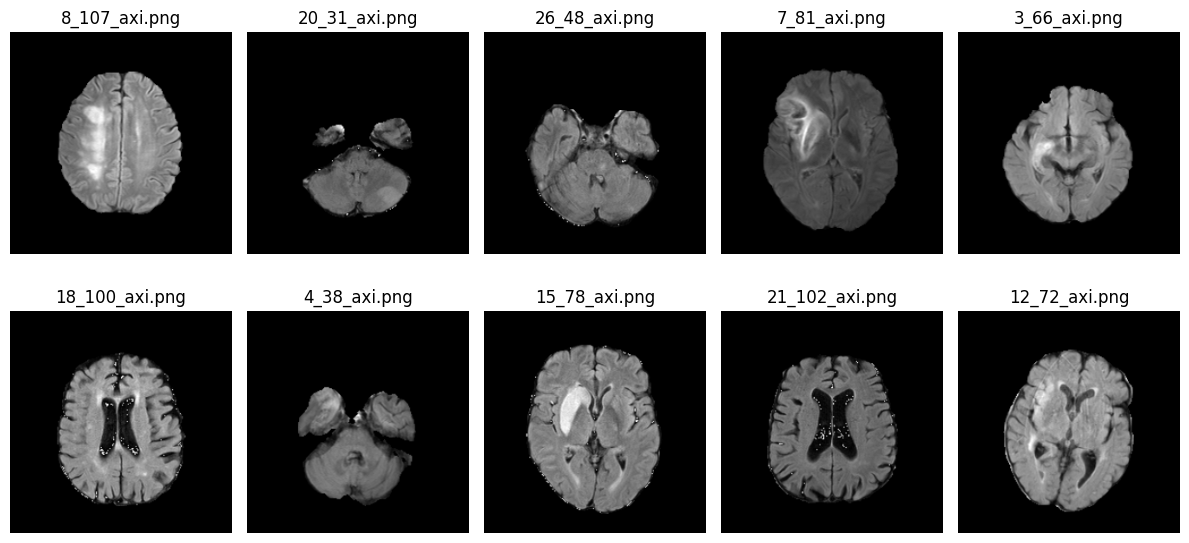

In [11]:
num_images = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, (images, masks, names) in enumerate(test_loader):
    if i >= num_images:
        break

    image = images.squeeze(dim=0).permute(1, 2, 0)
    mask = masks.squeeze(dim=0)
    image=image.numpy()
      # Print the values of the mask
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(names[0])
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

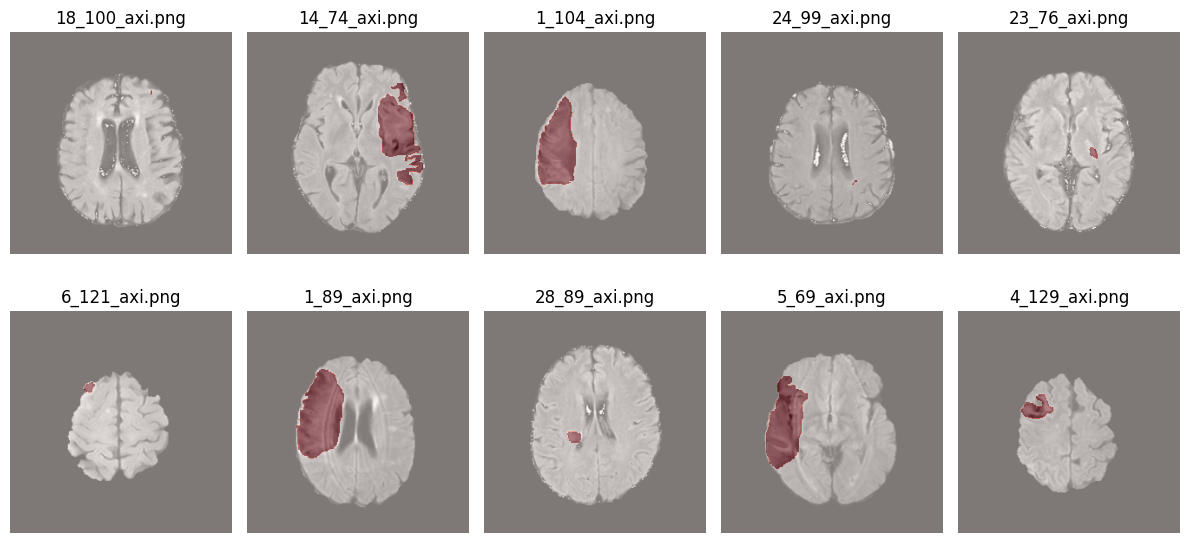

In [18]:
num_images = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, (images, masks, names) in enumerate(test_loader):
    if i >= num_images:
        break

    image = images.squeeze(dim=0).permute(1, 2, 0).numpy()
    mask = masks.squeeze(dim=0).numpy()

    # Print the values of the mask
    row = i // 5
    col = i % 5

    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].imshow(mask, alpha=0.5, cmap='Reds')
    axes[row, col].set_title(names[0])
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

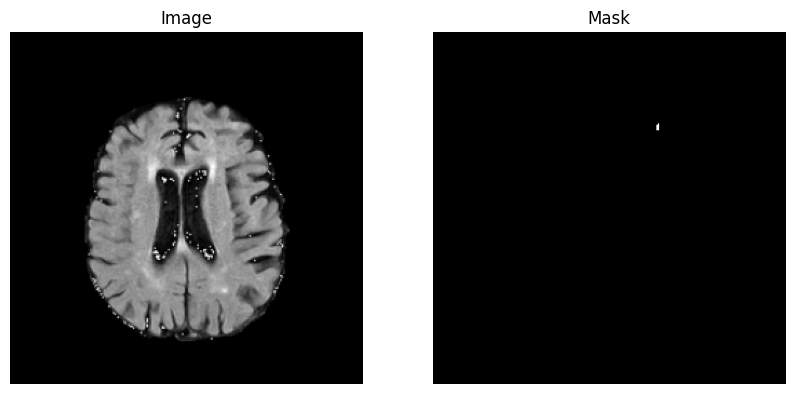

In [19]:
import matplotlib.pyplot as plt

images, masks, name = next(iter(test_loader))
index = random.randint(0, images.size(0)-1)
image = images.squeeze(dim=0).permute(1, 2, 0)
mask = masks.squeeze(dim=0)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title('Image')
ax[0].axis('off')
ax[1].imshow(mask, cmap="gray")  # Display only the first channel of the mask
ax[1].set_title('Mask')
ax[1].axis('off')
plt.show()

In [ ]:
def symmetric_focal_loss(y_pred, y_true, delta=0.5, gamma=2.0, smoothing=1e-6):
    # y_pred = torch.clamp(y_pred, smoothing, 1. - smoothing)
    ce_loss = F.binary_cross_entropy_with_logits(y_pred, y_true, reduction='none')
    pt = torch.exp(-ce_loss)
    delta = delta * (y_true != 0).float() + (1 -delta) * (y_true == 0).float()
    focal_loss = delta * torch.pow((1 - pt), gamma) * ce_loss
    return focal_loss

def symmetric_focal_tversky_loss(y_true, y_pred, delta=0.7, gamma=0.75, smoothing=1e-6):
    # y_pred = torch.clamp(y_pred, smoothing, 1. - smoothing)
    y_true = y_true.squeeze(dim=1).long()
    y_true_pos = (y_true != 0).float()
    y_pred_pos = y_pred[..., 1]
    true_pos = torch.sum(y_true_pos * y_pred_pos)
    false_neg = torch.sum(y_true_pos * (1 - y_pred_pos))
    false_pos = torch.sum((1 - y_true_pos) * y_pred_pos)
    tversky = (true_pos + smoothing) / (true_pos + delta * false_neg + (1-delta) * false_pos + smoothing)
    gamma_tversky = torch.pow((1 - tversky), gamma)
    focal_tversky = gamma_tversky * tversky
    return focal_tversky


def sym_unified_focal_loss(weight=0.5, delta=0.6, gamma=0.5):
    def loss_function(y_true, y_pred):
        symmetric_ftl = symmetric_focal_tversky_loss(y_true, y_pred, gamma=gamma,delta=delta)
        symmetric_fl = symmetric_focal_loss(y_true, y_pred, gamma=gamma,delta=delta)
        if weight is not None:
            loss = (weight * symmetric_ftl) + ((1 - weight) * symmetric_fl)
        else:
            loss = symmetric_ftl + symmetric_fl
        return loss.mean()
    return loss_function

In [ ]:
import torch
import torch.nn as nn
def identify_axis(shape):
    # Three dimensional
    if len(shape) == 5 : return [2,3,4]

    # Two dimensional
    elif len(shape) == 4 : return [2,3]

    # Exception - Unknown
    else : raise ValueError('Metric: Shape of tensor is neither 2D or 3D.')


class SymmetricUnifiedFocalLoss(nn.Module):
    def __init__(self, weight=0.5, delta=0.6, gamma=0.5):
        super(SymmetricUnifiedFocalLoss, self).__init__()
        self.weight = weight
        self.delta = delta
        self.gamma = gamma
        self.symmetric_ftl = SymmetricFocalTverskyLoss(delta=self.delta, gamma=self.gamma)
        self.symmetric_fl = SymmetricFocalLoss(delta=self.delta, gamma=self.gamma)

    def forward(self, y_pred, y_true):
        loss_ftl = self.symmetric_ftl(y_pred, y_true)
        loss_fl = self.symmetric_fl(y_pred, y_true)
        if self.weight is not None:
            loss = (self.weight * loss_ftl) + ((1 - self.weight) * loss_fl)
        else:
            loss = loss_ftl + loss_fl
        return loss


class AsymmetricUnifiedFocalLoss(nn.Module):
    def __init__(self, weight=0.5, delta=0.6, gamma=0.2):
        super(AsymmetricUnifiedFocalLoss, self).__init__()
        self.weight = weight
        self.delta = delta
        self.gamma = gamma
        self.asymmetric_ftl = AsymmetricFocalTverskyLoss(delta=self.delta, gamma=self.gamma)
        self.asymmetric_fl = AsymmetricFocalLoss(delta=self.delta, gamma=self.gamma)

    def forward(self, y_pred, y_true):
        loss_ftl = self.asymmetric_ftl(y_pred, y_true)
        loss_fl = self.asymmetric_fl(y_pred, y_true)
        if self.weight is not None:
            loss = (self.weight * loss_ftl) + ((1 - self.weight) * loss_fl)
        else:
            loss = loss_ftl + loss_fl
        return loss


class SymmetricFocalLoss(nn.Module):
    def __init__(self, delta=0.7, gamma=2.0, epsilon=1e-07):
        super(SymmetricFocalLoss, self).__init__()
        self.delta = delta
        self.gamma = gamma
        self.epsilon = epsilon

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, self.epsilon, 1.0 - self.epsilon)
        cross_entropy = -y_true * torch.log(y_pred)

        back_ce = torch.pow(1 - y_pred[:, 0, :, :], self.gamma) * cross_entropy[:, 0, :, :]
        back_ce = (1 - self.delta) * back_ce

        fore_ce = torch.pow(1 - y_pred[:, 1, :, :], self.gamma) * cross_entropy[:, 1, :, :]
        fore_ce = self.delta * fore_ce

        loss = torch.mean(torch.sum(torch.stack([back_ce, fore_ce], dim=-1), dim=-1))

        return loss


class AsymmetricFocalLoss(nn.Module):
    def __init__(self, delta=0.7, gamma=2.0, epsilon=1e-07):
        super(AsymmetricFocalLoss, self).__init__()
        self.delta = delta
        self.gamma = gamma
        self.epsilon = epsilon

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, self.epsilon, 1.0 - self.epsilon)
        cross_entropy = -y_true * torch.log(y_pred)

        back_ce = torch.pow(1 - y_pred[:, 0, :, :], self.gamma) * cross_entropy[:, 0, :, :]
        back_ce = (1 - self.delta) * back_ce

        fore_ce = cross_entropy[:, 1, :, :]
        fore_ce = self.delta * fore_ce

        loss = torch.mean(torch.sum(torch.stack([back_ce, fore_ce], dim=-1), dim=-1))

        return loss


class SymmetricFocalTverskyLoss(nn.Module):
    def __init__(self, delta=0.7, gamma=0.75, epsilon=1e-07):
        super(SymmetricFocalTverskyLoss, self).__init__()
        self.delta = delta
        self.gamma = gamma
        self.epsilon = epsilon

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, self.epsilon, 1.0 - self.epsilon)
        axis = identify_axis(y_true.size())

        tp = torch.sum(y_true * y_pred, dim=axis)
        fn = torch.sum(y_true * (1 - y_pred), dim=axis)
        fp = torch.sum((1 - y_true) * y_pred, dim=axis)
        dice_class = (tp + self.epsilon) / (tp + self.delta * fn + (1 - self.delta) * fp + self.epsilon)

        back_dice = (1 - dice_class[:, 0]) * torch.pow(1 - dice_class[:, 0], -self.gamma)
        fore_dice = (1 - dice_class[:, 1]) * torch.pow(1 - dice_class[:, 1], -self.gamma)

        loss = torch.mean(torch.stack([back_dice, fore_dice], dim=-1))

        return loss


class AsymmetricFocalTverskyLoss(nn.Module):
    def __init__(self, delta=0.7, gamma=0.75, epsilon=1e-07):
        super(AsymmetricFocalTverskyLoss, self).__init__()
        self.delta = delta
        self.gamma = gamma
        self.epsilon = epsilon

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, self.epsilon, 1.0 - self.epsilon)
        axis = identify_axis(y_true.size())

        tp = torch.sum(y_true * y_pred, dim=axis)
        fn = torch.sum(y_true * (1 - y_pred), dim=axis)
        fp = torch.sum((1 - y_true) * y_pred, dim=axis)
        dice_class = (tp + self.epsilon) / (tp + self.delta * fn + (1 - self.delta) * fp + self.epsilon)

        back_dice = (1 - dice_class[:, 0])
        fore_dice = (1 - dice_class[:, 1]) * torch.pow(1 - dice_class[:, 1], -self.gamma)

        loss = torch.mean(torch.stack([back_dice, fore_dice], dim=-1))

        return loss


#Nueva


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def identify_axis(shape):
    # Three dimensional
    if len(shape) == 5: return [2, 3, 4]

    # Two dimensional
    elif len(shape) == 4: return [2, 3]

    # Exception - Unknown
    else: raise ValueError('Metric: Shape of tensor is neither 2D or 3D.')


class SymmetricUnifiedFocalLoss(nn.Module):
    def __init__(self, weight=0.5, delta=0.6, gamma=0.5):
        super(SymmetricUnifiedFocalLoss, self).__init__()
        self.weight = weight
        self.delta = delta
        self.gamma = gamma
        self.symmetric_ftl = SymmetricFocalTverskyLoss(delta=self.delta, gamma=self.gamma)
        self.symmetric_fl = SymmetricFocalLoss(delta=self.delta, gamma=self.gamma)

    def forward(self, y_pred, y_true):
        loss_ftl = self.symmetric_ftl(y_pred, y_true)
        loss_fl = self.symmetric_fl(y_pred, y_true)
        if self.weight is not None:
            loss = (self.weight * loss_ftl) + ((1 - self.weight) * loss_fl)
        else:
            loss = loss_ftl + loss_fl
        return loss


class AsymmetricUnifiedFocalLoss(nn.Module):
    def __init__(self, weight=0.5, delta=0.6, gamma=0.2):
        super(AsymmetricUnifiedFocalLoss, self).__init__()
        self.weight = weight
        self.delta = delta
        self.gamma = gamma
        self.asymmetric_ftl = AsymmetricFocalTverskyLoss(delta=self.delta, gamma=self.gamma)
        self.asymmetric_fl = AsymmetricFocalLoss(delta=self.delta, gamma=self.gamma)

    def forward(self, y_pred, y_true):
        loss_ftl = self.asymmetric_ftl(y_pred, y_true)
        loss_fl = self.asymmetric_fl(y_pred, y_true)
        if self.weight is not None:
            loss = (self.weight * loss_ftl) + ((1 - self.weight) * loss_fl)
        else:
            loss = loss_ftl + loss_fl
        return loss


class SymmetricFocalLoss(nn.Module):
    def __init__(self, delta=0.7, gamma=2.0, epsilon=1e-07):
        super(SymmetricFocalLoss, self).__init__()
        self.delta = delta
        self.gamma = gamma
        self.epsilon = epsilon

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, self.epsilon, 1.0 - self.epsilon)
        cross_entropy = F.binary_cross_entropy_with_logits(y_pred, y_true, reduction='none')

        back_ce = torch.pow(1 - y_pred[:, 0, :, :], self.gamma) * cross_entropy[:, 0, :, :]
        back_ce = (1 - self.delta) * back_ce

        fore_ce = torch.pow(1 - y_pred[:, 1, :, :], self.gamma) * cross_entropy[:, 1, :, :]
        fore_ce = self.delta * fore_ce

        loss = torch.mean(torch.sum(torch.stack([back_ce, fore_ce], dim=-1), dim=-1))

        return loss


class AsymmetricFocalLoss(nn.Module):
    def __init__(self, delta=0.7, gamma=2.0, epsilon=1e-07):
        super(AsymmetricFocalLoss, self).__init__()
        self.delta = delta
        self.gamma = gamma
        self.epsilon = epsilon

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, self.epsilon, 1.0 - self.epsilon)
        cross_entropy = F.binary_cross_entropy_with_logits(y_pred, y_true, reduction='none')

        back_ce = torch.pow(1 - y_pred[:, 0, :, :], self.gamma) * cross_entropy[:, 0, :, :]
        back_ce = (1 - self.delta) * back_ce

        fore_ce = cross_entropy[:, 1, :, :]
        fore_ce = self.delta * fore_ce

        loss = torch.mean(torch.sum(torch.stack([back_ce, fore_ce], dim=-1), dim=-1))

        return loss


class SymmetricFocalTverskyLoss(nn.Module):
    def __init__(self, delta=0.7, gamma=0.75, epsilon=1e-07):
        super(SymmetricFocalTverskyLoss, self).__init__()
        self.delta = delta
        self.gamma = gamma
        self.epsilon = epsilon

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, self.epsilon, 1.0 - self.epsilon)
        axis = identify_axis(y_true.size())

        tp = torch.sum(y_true * y_pred, dim=axis)
        fn = torch.sum(y_true * (1 - y_pred), dim=axis)
        fp = torch.sum((1 - y_true) * y_pred, dim=axis)
        dice_class = (tp + self.epsilon) / (tp + self.delta * fn + (1 - self.delta) * fp + self.epsilon)

        back_dice = (1 - dice_class[:, 0]) * torch.pow(1 - dice_class[:, 0], -self.gamma)
        fore_dice = (1 - dice_class[:, 1]) * torch.pow(1 - dice_class[:, 1], -self.gamma)

        loss = torch.mean(torch.stack([back_dice, fore_dice], dim=-1))

        return loss


class AsymmetricFocalTverskyLoss(nn.Module):
    def __init__(self, delta=0.7, gamma=0.75, epsilon=1e-07):
        super(AsymmetricFocalTverskyLoss, self).__init__()
        self.delta = delta
        self.gamma = gamma
        self.epsilon = epsilon

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, self.epsilon, 1.0 - self.epsilon)
        axis = identify_axis(y_true.size())

        tp = torch.sum(y_true * y_pred, dim=axis)
        fn = torch.sum(y_true * (1 - y_pred), dim=axis)
        fp = torch.sum((1 - y_true) * y_pred, dim=axis)
        dice_class = (tp + self.epsilon) / (tp + self.delta * fn + (1 - self.delta) * fp + self.epsilon)

        back_dice = (1 - dice_class[:, 0])
        fore_dice = (1 - dice_class[:, 1]) * torch.pow(1 - dice_class[:, 1], -self.gamma)

        loss = torch.mean(torch.stack([back_dice, fore_dice], dim=-1))

        return loss

In [ ]:
# ! pip install segmentation-models-pytorch
# import segmentation_models_pytorch as smp
# from segmentation_models_pytorch.encoders import get_preprocessing_fn

In [ ]:
# model = smp.Unet(
#     encoder_name="se_resnet50",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
#     encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
#     in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
#     classes=1,                      # model output channels (number of classes in your dataset)
# )

In [ ]:
# weights = ResNet50_Weights.IMAGENET1K_V2
# model = smp.Unet('resnet50', encoder_weights='imagenet',in_channels=1,classes=1,decoder_attention_type="scse").to(device)
# preprocess = weights.transforms()

In [ ]:
# preprocess_input = get_preprocessing_fn('resnet50', pretrained='imagenet')

In [ ]:
# print(model)

In [ ]:
# for name, module in model.named_modules():
#     if hasattr(module, 'relu'):
#         module.relu = nn.Mish(inplace=True)

In [ ]:
# print (model)

In [ ]:
# print(model.segmentation_head)

SegmentationHead(
  (0): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Identity()
  (2): Activation(
    (activation): Softmax2d()
  )
)


In [ ]:
  # for module in model.decoder.modules():
  #     if isinstance(module, nn.ReLU):
  #         module = nn.Mish(inplace=True)

In [ ]:
# print(model.decoder.blocks[0])

In [ ]:
# for block in model.decoder.blocks:
#     # Replace ReLU(inplace=True) with Mish in conv1 submodule
#     block.conv1[2] = nn.Mish(inplace=True)

#     # Replace ReLU(inplace=True) with Mish in conv2 submodule
#     block.conv2[2] = nn.Mish(inplace=True)

In [ ]:
# print(model)

In [ ]:
# criterion=sym_unified_focal_loss(weight=.3, delta=0.6, gamma=1)


In [ ]:
# for name, module in model.decoder.named_modules():
#     if hasattr(module, 'relu'):
#         module.relu = nn.Mish(inplace=True)

In [ ]:
# from segmentation_models_pytorch.losses import FocalLoss
# criterion=FocalLoss(mode='binary',alpha=2)


In [ ]:
model=UNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    channels=(32,64,128,256,512),
    strides=(2,2,2,2),
    num_res_units=1,
    norm="BATCH",
    act=monai.networks.layers.Act.MISH
).to(device)
# criterion=AsymmetricUnifiedFocalLoss(weight=.1, delta=0.6, gamma=1)
# criterion = sym_unified_focal_loss(weight=.1, delta=0.2, gamma=1)
criterion=GeneralizedDiceFocalLoss(lambda_focal=.6,lambda_gdl=4,gamma=1,sigmoid=True,softmax=False,to_onehot_y=False)
optimizer = optim.AdamW(model.parameters(), lr=1e-3)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)


In [22]:
model=AttentionUnet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    channels=(32,64,128,256,512),
    strides=(1,2,2,2,2),
    dropout=.3,
).to(device)

In [ ]:
print(model)

In [13]:
! pip install torch_optimizer

In [15]:
import torch_optimizer as optimi
from torch.optim.lr_scheduler import CyclicLR

In [24]:
from monai.losses import GeneralizedDiceFocalLoss
optimizer = optimi.MADGRAD(
    model.parameters(),
    lr=1e-3,
    momentum=0.9,
    eps=1e-6,
)
# optimizer = optim.AdamW(model.parameters(), lr=1e-4)
# criterion = SymmetricUnifiedFocalLoss(weight=0.5, delta=0.7, gamma=1)
criterion=GeneralizedDiceFocalLoss(lambda_focal=.6,lambda_gdl=.4,gamma=2,sigmoid=True,softmax=False,to_onehot_y=False)
# scheduler=CyclicLR(optimizer,base_lr=1e-4,max_lr=1e-2,mode="exp_range",verbose=False,cycle_momentum =False)

scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.01, patience=50, verbose=True)

In [ ]:
print(model)

In [ ]:

model= SwinUNETR(img_size=(256,256), in_channels=1, out_channels=1 ,use_checkpoint=True, spatial_dims=2,norm_name="BATCH").to(device)

criterion=GeneralizedDiceFocalLoss(lambda_focal=.7,lambda_gdl=.3,gamma=1,sigmoid=True,softmax=False,to_onehot_y=False)

# criterion = AsymmetricUnifiedFocalLoss(weight=.1, delta=0.7, gamma=1)
# criterion=sym_unified_focal_loss(weight=.3, delta=0.3, gamma=1)

optimizer = optim.AdamW(model.parameters(), lr=1e-4)

# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=30, verbose=True)
scheduler=CyclicLR(optimizer,base_lr=1e-4,max_lr=1e-2,step_size_up=1000,mode="exp_range",step_size_down=False,gamma=2,verbose=True,cycle_momentum =False)

Adjusting learning rate of group 0 to 1.0000e-04.


In [ ]:
model= SwinUNETR(img_size=(256,256), in_channels=1, out_channels=1 ,use_checkpoint=True, spatial_dims=2,norm_name="BATCH").to(device)

In [ ]:
criterion=DiceLoss(include_background=True, to_onehot_y=False, sigmoid=True, softmax=False, other_act=None, squared_pred=False, jaccard=True )

In [ ]:

# scheduler=CyclicLR(optimizer,base_lr=1e-4,max_lr=1,mode="exp_range",step_size_up=10,step_size_down=False,verbose=True,cycle_momentum =False)
# criterion = sym_unified_focal_loss(weight=.5, delta=0.7, gamma=1)

In [ ]:
from  torch.optim.lr_scheduler import CyclicLR

In [ ]:
model = smp.Unet('resnet50', encoder_weights='imagenet',in_channels=1,classes=1,decoder_attention_type="scse").to(device)
# model.segmentation_head[2].activation = nn.Softmax2d()
optimizer = optim.AdamW(model.parameters(), lr=1e-3)
criterion=GeneralizedDiceFocalLoss(include_background=False,lambda_focal=.5,lambda_gdl=.5,gamma=1,sigmoid=True,softmax=False,to_onehot_y=False)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=30, verbose=True)
# scheduler=CyclicLR(optimizer,base_lr=1e-4,max_lr=1e-2,mode="exp_range",step_size_down=False,gamma=2,verbose=True,cycle_momentum =False)


In [ ]:
print(model)

In [25]:
use_amp = True
num_epochs = 200
train_losses = []
val_losses = []
train_ious = []
val_ious = []
total_image=0

total_augmentations = 0
scaler = torch.cuda.amp.GradScaler(enabled=use_amp)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_loss2 = 0.0
    train_iou = 0.0
    val_iou = 0.0
    total_train_samples = 0
    total_val_samples = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)
        with torch.cuda.amp.autocast(enabled=use_amp):

          outputs = model(inputs.to(device).float())
          num_augmentations = inputs.shape[0]  # number of times each image is augmented
          total_augmentations += num_augmentations
          # outputs=torch.sigmoid(outputs)
          # outuputs=nn.Threshold(.5,0)
          # labels=labels.unsqueeze(dim=1)
          labels.shape
          labels = labels.permute(0, 3, 1, 2)

          predicted_masks = torch.sigmoid(outputs) > 0.5  # Apply threshold
          intersection = torch.logical_and(predicted_masks, labels)
          union = torch.logical_or(predicted_masks, labels)
          iou = torch.sum(intersection) / torch.sum(union)
          train_iou += iou.item()
          total_train_samples += num_augmentations
          # labels=torch.sigmoid(labels)
          # print(outputs.shape)
          # print(labels.shape)
          loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        # scheduler.step()
        optimizer.zero_grad()

        train_loss += loss.item()
    model.eval()
    val_loss = 0.0
    val_loss2 = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs.float())
            labels = labels.permute(0, 3, 1, 2)
            predicted_masks = torch.sigmoid(outputs) > 0.5  # Apply threshold
            intersection = torch.logical_and(predicted_masks, labels)
            union = torch.logical_or(predicted_masks, labels)
            iou = torch.sum(intersection) / torch.sum(union)
            val_iou += iou.item()

            total_val_samples += inputs.size(0)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    train_iou /= len(train_loader)
    val_iou /= len(val_loader)

    train_ious.append(train_iou)
    val_ious.append(val_iou)


    print(f"Epoch {epoch + 1}/{num_epochs} | Train loss: {train_loss:.4f} | Val loss: {val_loss:.4f} | | Train IoU: {train_iou:.4f} | Val IoU: {val_iou:.4f} | ")
    scheduler.step(val_iou)

    if epoch % 5==0:
      torch.save(model.state_dict(), '/content/drive/MyDrive/A_brain/ISLES2015/Data/' + 'attention_01_07.pth')

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_ious, label='Train iou')
plt.plot(val_ious, label='Validation iou')
plt.legend()
plt.show()

print(f"Epoch {epoch + 1}/{num_epochs} | Train loss: {train_loss}")
print(f"Total augmentations made: {total_augmentations}")


Epoch 1/200 | Train loss: 0.4201 | Val loss: 0.3704 | | Train IoU: 0.2793 | Val IoU: 0.3938 | 
Epoch 2/200 | Train loss: 0.3535 | Val loss: 0.3257 | | Train IoU: 0.4643 | Val IoU: 0.5267 | 
Epoch 3/200 | Train loss: 0.3006 | Val loss: 0.2484 | | Train IoU: 0.4915 | Val IoU: 0.5475 | 
Epoch 4/200 | Train loss: 0.2526 | Val loss: 0.2193 | | Train IoU: 0.5210 | Val IoU: 0.5766 | 
Epoch 5/200 | Train loss: 0.2224 | Val loss: 0.2008 | | Train IoU: 0.5757 | Val IoU: 0.5820 | 
Epoch 6/200 | Train loss: 0.2186 | Val loss: 0.2244 | | Train IoU: 0.5643 | Val IoU: 0.5646 | 
Epoch 7/200 | Train loss: 0.2124 | Val loss: 0.1883 | | Train IoU: 0.5889 | Val IoU: 0.6161 | 
Epoch 8/200 | Train loss: 0.2101 | Val loss: 0.1867 | | Train IoU: 0.5843 | Val IoU: 0.5989 | 
Epoch 9/200 | Train loss: 0.2028 | Val loss: 0.1713 | | Train IoU: 0.5976 | Val IoU: 0.6599 | 
Epoch 10/200 | Train loss: 0.1992 | Val loss: 0.2249 | | Train IoU: 0.6066 | Val IoU: 0.5299 | 
Epoch 11/200 | Train loss: 0.1973 | Val loss: 0.1

FileNotFoundError: ignored

In [ ]:
plt.plot(criterion2_train, label='Train IoU Loss')
plt.plot(criterion2_val, label='Validation IoU Loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
print(labels.shape)
print(labels.unsqueeze(dim=1).shape)

In [ ]:
import csv
PATH='/content/drive/MyDrive/A_brain/ISLES2015/Data/ISLES_AXIAL/'

data = {'train_losses': train_losses, 'val_losses': val_losses}
df = pd.DataFrame(data)
df.to_csv(PATH+'SWINUNET_200_AXIAL.csv', index=False)

torch.save(model.state_dict(), PATH + '/mad_200_AXIAL.pth')

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
PATH='/content/drive/MyDrive/A_brain/ISLES2015/Data/ISLES_AXIAL/'
PATH='/content/drive/MyDrive/A_brain/ISLES2015/Data/' + 'prueba_swin.pth'
model.load_state_dict(torch.load(PATH))
# model.load_state_dict(torch.load(PATH + '/swin.pth'))


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,jaccard_score
from keras.metrics import MeanIoU
from skimage.exposure import adjust_sigmoid
import os
from skimage import exposure
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
from skimage.filters import threshold_otsu
from skimage.filters.rank import entropy
from skimage.morphology import disk


In [ ]:
DIR="/content/drive/MyDrive/A_brain/ISLES2015/Images_Ensemble/RES50_UNET_SaE/"

# # Load the trained model
model.cpu()
# # Set the model to evaluation mode
model.eval()
VALUES = pd.DataFrame(columns=['Filename', 'IoU', 'mIoU', 'Accuracy', 'Precision', 'Recall', 'F1'])
F1=[]
mIoU_values = []
ACCURACY=[]
F1=[]
RECALL=[]
PRECISION=[]
image_list=[]
IoU=[]
# model.cpu()
# Iterate over the data and generate masks
for i, data in enumerate(test_loader):
    input=data[0]
    # print(input.shape)
    imagen=input.squeeze(dim=(0,1))
    # print(imagen.shape)
    labels=data[1].permute(0,3,1,2)
    # labels=data[1]

    # print(labels.shape)
    labels=labels.squeeze(dim=(0,1))
    # print(labels.shape)
    pred_mask = model(input.float())[0]
    # print(pred_mask.shape)
    image = imagen.cpu()
    mask = labels.cpu()
    pred_mask = pred_mask.detach().cpu().numpy().squeeze()
    # pred_mask[1]=exposure.rescale_intensity(pred_mask[1],out_range=(0,1))
    # pred_mask[0]=exposure.rescale_intensity(pred_mask[0],out_range=(0,1))

    # print(pred_mask.shape)
    # pred_mask=exposure.adjust_gamma(pred_mask,2)
    # pred_mask[1] = adjust_sigmoid(pred_mask[1], gain=10, cutoff=0.5)
    # print(np.unique(pred_mask))

    # th=threshold_otsu(pred_mask[1])
    # pred_mask[1]=(pred_mask[1]>=.5).astype(np.float32)

    predicted=(pred_mask>=0).astype(np.float32)



    pred_mask[1] =(pred_mask[1]>=.5).astype(np.float32)
    # pred_mask2=exposure.adjust_gamma(pred_mask1,4)
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    ax[0].imshow(image)
    ax[1].imshow(mask)
    # ax[2].imshow(mask[1])
    # ax[3].imshow(pred_mask[0], cmap='gist_heat')
    ax[2].imshow(predicted, cmap='gist_heat')
    # # Remove axes
    for i in range(3):
      ax[i].axis('off')
    ax[0].set_title('Input Image')
    ax[1].set_title('GT Mask Background')
    # ax[2].set_title('GT Mask Foreground')
    # ax[3].set_title('Pred_ Mask Background')
    ax[2].set_title('Pred_Mask Foreground')
    plt.show()

    # fig, ax = plt.subplots(1, 5, figsize=(15, 3))
    # ax[0].imshow(image)
    # ax[1].imshow(mask[0])
    # ax[2].imshow(mask[1])
    # ax[3].imshow(pred_mask[0], cmap='gist_heat')
    # ax[4].imshow(pred_mask[1], cmap='gist_heat')
    # # Remove axes
    # for i in range(5):
    #     ax[i].axis('off')
    # ax[0].set_title('Input Image')
    # ax[1].set_title('GT Mask Background')
    # ax[2].set_title('GT Mask Foreground')
    # ax[3].set_title('Pred_ Mask Background')
    # ax[4].set_title('Pred_Mask Foreground')
    # plt.show()

    # pred_mask_int = pred_mask.astype(np.uint8) * 255

#     # Save the image
    filename = os.path.splitext(os.path.basename(dataset.img_files[i]))[0] + ".png"
    save_path = os.path.join(DIR, filename)
    pil_image = transforms.ToPILImage()(pred_mask)
    # pred_mask_save=(pred_mask / np.max(pred_mask)) * 65535
    io.imsave(save_path,pred_mask)

    mask=mask.numpy().astype(bool)
    pred_mask=predicted.astype(bool)

    predicted_tensor=transforms.ToTensor()(pred_mask)
#     image_list.append(predicted_tensor)

# #             # Create a file name for the image
#     filename = os.path.splitext(os.path.basename(dataset.img_files[i]))[0] + ".png"
#     # save_path = os.path.join(save_dir, filename)
#     pred_mask_int = pred_mask.astype(np.uint8) * 255

# #     # Save the image
#     pil_image = transforms.ToPILImage()(pred_mask_int)
#     pil_image.save(save_path)


#     Accuracy=accuracy_score(mask.reshape(-1),pred_mask.reshape(-1))
#     ACCURACY.append(Accuracy)

#     prec=precision_score(mask.reshape(-1),pred_mask.reshape(-1))
#     PRECISION.append(prec)

#     # print("Recall --> ",recall_score(img_T.reshape(-1),img_P.reshape(-1)))
#     rec=recall_score(mask.reshape(-1),pred_mask.reshape(-1))
#     RECALL.append(rec)

#     f1=f1_score(mask.reshape(-1),pred_mask.reshape(-1))
#     F1.append(f1)



#     # # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(mask.reshape(-1), pred_mask.reshape(-1)).ravel()
    print(tp / (tp+fp+fn))

    IoU.append(round(tp / (tp+fp+fn),4))


#     mIoU = MeanIoU(num_classes=2)
#     mIoU.update_state(mask, pred_mask)
#     mIoU = mIoU.result().numpy()
#     mIoU_values.append(mIoU)

#     filename = os.path.splitext(os.path.basename(dataset.img_files[i]))[0] + ".png"

#     VALUES = VALUES.append({'Filename': filename,
#                     'IoU': round(tp / (tp+fp+fn),4),
#                     'mIoU': round(mIoU,4),
#                     'Accuracy': round(Accuracy,4),
#                     'Precision': round(prec,4),
#                     'Recall': round(rec,4),
#                     'F1': round(f1,4)}, ignore_index=True)


# # VALUES.to_csv(PATH+'evaluation_metrics_CELLAVISION.csv', index=False)

# print("Accuracy",round(np.mean(ACCURACY),4))
# print("Precision",round(np.mean(PRECISION),4))
# print("Recall",round(np.mean(RECALL),4))
# print("F1",round(np.mean(F1),4))
# print("IoU",round(np.mean(IoU),4))
# print("mIoU",round(np.mean(mIoU_values),4))



In [ ]:
print(round(np.mean(IoU),3))

0.802


In [ ]:
Dice=(2*np.mean(IoU))/(1+np.mean(IoU))

In [ ]:
print(round(Dice,3))

0.89


In [ ]:
def Metricas (GT,HC):

    Accuracy=accuracy_score(GT.reshape(-1),HC.reshape(-1))
    Precision=precision_score(GT.reshape(-1),HC.reshape(-1))
    Recall=recall_score(combined_mask.reshape(-1),HC.reshape(-1))
    F1=f1_score(GT.reshape(-1),HC.reshape(-1))

    tn,fp,fn,tp =confusion_matrix(GT.reshape(-1), HC.reshape(-1)).ravel()
    Specificity=tn / (tn+fp)
    IOU=tp / (tp + fp +fn)

    mIoU= MeanIoU(num_classes=2)
    mIoU.update_state(GT, HC)
    mIoU = mIoU.result().numpy()
    return Accuracy,Precision,Recall,F1,IOU,mIoU,Specificity

In [ ]:
import os
from skimage import exposure
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
from skimage.filters import threshold_otsu

save_dir='/content/drive/MyDrive/MDPI/UNET_EN/DL/'
img_folder = "/content/drive/MyDrive/MDPI/Images/Images/CellaVision/Images/"
mask_folder = "/content/drive/MyDrive/MDPI/Images/Images/CellaVision/GT/"
class InferenceDataset(Dataset):
    def __init__(self, img_folder, mask_folder, transform=None):
        self.img_folder = img_folder
        self.mask_folder = mask_folder
        self.transform = transform
        self.img_files = sorted(os.listdir(self.img_folder))

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, index):
        img_path = os.path.join(self.img_folder, self.img_files[index])
        mask_path = os.path.join(self.mask_folder, self.img_files[index])
        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')

        if self.transform:
            augmented = self.transform(image=np.array(image), mask=np.array(mask))
            image, mask = augmented["image"], augmented["mask"]

        # Convert mask to one-hot encoding
            # Convert mask to one-hot encoding
        mask_onehot = torch.zeros((mask.shape[0], mask.shape[1], 1), dtype=torch.float32)
        mask_onehot[..., 0] = (mask == 255).float()
        return image, mask_onehot

test_transforms = A.Compose([
    A.Resize(256, 256),
    ToTensorV2()
])

VALUES = pd.DataFrame(columns=['Filename', 'IoU', 'mIoU', 'Accuracy', 'Precision', 'Recall', 'F1'])

IoU=[]
# Load the dataset

dataset = InferenceDataset(img_folder, mask_folder, transform=test_transforms)

# Define the dataloader
batch_size = 1
loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Load the trained model
model.cpu()
# # Set the model to evaluation mode
model.eval()

F1=[]
mIoU_values = []
ACCURACY=[]
F1=[]
RECALL=[]
PRECISION=[]
image_list=[]
# model.cpu()
# Iterate over the data and generate masks
for i, data in enumerate(loader):
    input=data[0]
    # print(input.shape)
    imagen=input.squeeze(dim=(0,1))
    # print(imagen.shape)
    labels=data[1].permute(0,3,1,2)
    # print(labels.shape)
    labels=labels.squeeze(dim=(0,1))
    pred_mask = model(input.float())[0]
    image = imagen.cpu()
    mask = labels.cpu()
    pred_mask = pred_mask.detach().cpu().numpy().squeeze()
    pred_mask=exposure.rescale_intensity(pred_mask,out_range=(0,1))
    # pred_mask=exposure.adjust_gamma(pred_mask,2)
    th=threshold_otsu(pred_mask)
    pred_mask=(pred_mask>th).astype(np.float32)


    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ax[0].imshow(image.permute(1, 2, 0))
    ax[1].imshow(mask, cmap='gray')
    ax[2].imshow(pred_mask, cmap='gray')
    ax[0].set_title('Input Image')
    ax[1].set_title('Ground Truth Mask')
    ax[2].set_title('Predicted Mask')
    for j in range(3):
      ax[j].set_axis_off()
    plt.show()

    mask=mask.numpy().astype(bool)
    pred_mask=pred_mask.astype(bool)

    predicted_tensor=transforms.ToTensor()(pred_mask)
    image_list.append(predicted_tensor)

    #         # Create a file name for the image
    filename = os.path.splitext(os.path.basename(dataset.img_files[i]))[0] + ".png"
    save_path = os.path.join(save_dir, filename)

    # print(save_path)
    pred_mask_int = pred_mask.astype(np.uint8) * 255

    # Save the image
    pil_image = transforms.ToPILImage()(pred_mask_int)
    pil_image.save(save_path)


    Accuracy=accuracy_score(mask.reshape(-1),pred_mask.reshape(-1))
    ACCURACY.append(Accuracy)

    prec=precision_score(mask.reshape(-1),pred_mask.reshape(-1))
    PRECISION.append(prec)

    # print("Recall --> ",recall_score(img_T.reshape(-1),img_P.reshape(-1)))
    rec=recall_score(mask.reshape(-1),pred_mask.reshape(-1))
    RECALL.append(rec)

    f1=f1_score(mask.reshape(-1),pred_mask.reshape(-1))
    F1.append(f1)



    # # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(mask.reshape(-1), pred_mask.reshape(-1)).ravel()
    print(tp / (tp+fp+fn))

    IoU.append(round(tp / (tp+fp+fn),4))


    mIoU = MeanIoU(num_classes=2)
    mIoU.update_state(mask, pred_mask)
    mIoU = mIoU.result().numpy()
    mIoU_values.append(mIoU)

print("Accuracy",round(np.mean(ACCURACY),4))
print("Precision",round(np.mean(PRECISION),4))
print("Recall",round(np.mean(RECALL),4))
print("F1",round(np.mean(F1),4))
print("IoU",round(np.mean(IoU),4))
print("mIoU",round(np.mean(mIoU_values),4))




RuntimeError: ignored

#SEGMENTATION WEIGHTED

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from scipy import ndimage as ndi
import pdb
from skimage.morphology import binary_closing,disk
from skimage import (
    filters, measure, segmentation
)
import imutils
from skimage.morphology import remove_small_objects

PATH= '/content/drive/MyDrive/MDPI/UNET_EN/'

hc_segmentation = '/content/drive/MyDrive/MDPI/Images/Images/CellaVision/HM'

dl_segmentation = '/content/drive/MyDrive/MDPI/UNET_EN/DL/'

ground_truth_folder = '/content/drive/MyDrive/MDPI/Images/Images/CellaVision/GT'

output_folder = '/content/drive/MyDrive/MDPI/UNET_EN/COMB/'


out_size=(300,300)
desired_size=(256,256)
handcrafted_weight = 0.9
deep_learning_weight = 0.1

transform=A.Compose([A.Resize(300, 300)],p=1)

Accuracy_HAND=[]
Precision_HAND=[]
Recall_HAND=[]
F1_HAND=[]
IOU_HAND=[]
mIOU_HAND=[]
Spec_HAND=[]

Accuracy_DEEP=[]
Precision_DEEP=[]
Recall_DEEP=[]
F1_DEEP=[]
IOU_DEEP=[]
mIOU_DEEP=[]
Spec_DEEP=[]

Accuracy_COMBINED=[]
Precision_COMBINED=[]
Recall_COMBINED=[]
F1_COMBINED=[]
IOU_COMBINED=[]
mIOU_COMBINED=[]
Spec_COMBINED=[]

VALUES_HC = pd.DataFrame(columns=['Filename', 'IoU', 'mIoU', 'Accuracy', 'Precision', 'Recall', 'F1','Spec'])
VALUES_DL = pd.DataFrame(columns=['Filename', 'IoU', 'mIoU', 'Accuracy', 'Precision', 'Recall', 'F1','Spec'])
VALUES_COMB = pd.DataFrame(columns=['Filename', 'IoU', 'mIoU', 'Accuracy', 'Precision', 'Recall', 'F1','Spec'])



for filename in os.listdir(hc_segmentation):
    # Load the binary mask generated by the handcrafted segmentation technique
    # handcrafted_mask = cv2.imread(os.path.join(hc_segmentation, filename), cv2.IMREAD_GRAYSCALE)
    handcrafted_mask = np.array(Image.open(os.path.join(hc_segmentation, filename)).convert('L'))

    handcrafted_mask=ndi.binary_dilation(handcrafted_mask,structure=disk(1) )
    handcrafted_mask=(ndi.binary_fill_holes(handcrafted_mask)).astype(np.uint8)
    # handcrafted_mask=handcrafted_mask.resize(desired_size)
    # Load the binary mask generated by the deep learning segmentation technique

        # read the tiff image here
    deep_learning_mask = np.array(Image.open(os.path.join(dl_segmentation, filename)).convert('L'))
    augmentations=transform(image=deep_learning_mask)
    deep_learning_mask=augmentations["image"]
    # deep_learning_mask =cv2.resize(deep_learning_mask,desired_size)

    GT =np.array(Image.open(os.path.join(ground_truth_folder, filename)).convert('L'))


    # deep_learning_mask =cv2.resize(deep_learning_mask,desired_size)
    # Combine the binary masks using a weighted sum
    # combined_mask = cv2.addWeighted(handcrafted_mask, handcrafted_weight, deep_learning_mask, deep_learning_weight, 0)
    combined_mask=np.logical_and(handcrafted_mask,deep_learning_mask)
    combined_mask1=np.logical_xor(handcrafted_mask,deep_learning_mask)
    combined_mask2=np.logical_and(combined_mask,np.logical_not(combined_mask1))

    # combined_mask2=(ndi.binary_fill_holes(handcrafted_mask)).astype(np.uint8)
    # # pdb.set_trace()
    # # Threshold the combined mask to obtain the final binary segmentation mask
    # final_mask = np.zeros_like(combined_mask)
    # th=threshold_otsu(combined_mask2)
    # # final_mask[combined_mask > 127] = 255
    # final_mask=combined_mask>th
    # combined_mask=final_mask

    # selem = disk(1)
    # combined_mask2=binary_closing(combined_mask, selem)
    # combined_mask=remove_small_objects(combined_mask,min_size=50)


    fig, ax = plt.subplots(1, 6, figsize=(10, 10),dpi=300)
    ax[0].imshow(GT)
    ax[1].imshow(handcrafted_mask, cmap='gray')
    ax[2].imshow(deep_learning_mask, cmap='gray')
    ax[3].imshow(combined_mask, cmap='gray')
    ax[4].imshow(combined_mask1, cmap='gray')
    ax[5].imshow(combined_mask2, cmap='gray')
    ax[0].set_title('GT')
    ax[1].set_title('HC_MASK')
    ax[2].set_title('DL_MASK')
    ax[3].set_title('Combined_AND')
    ax[4].set_title('Combined_XOR')
    ax[5].set_title('COMBINED')

    for j in range(6):
      ax[j].set_axis_off()
    plt.show()


    cv2.imwrite(os.path.join(output_folder, filename), combined_mask2.astype(np.uint8)*255)

    GT=GT.astype(bool)
    combined_mask=combined_mask.astype(bool)
    deep_learning_mask=deep_learning_mask.astype(bool)
    handcrafted_mask=handcrafted_mask.astype(bool)

    print(filename)
    Accuracy,Precision,Recall,F1,IOU,mIoU,Spec=Metricas(GT,handcrafted_mask)
    Accuracy_HAND.append(Accuracy)
    Precision_HAND.append(Precision)
    Recall_HAND.append(Recall)
    F1_HAND.append(F1)
    IOU_HAND.append(IOU)
    mIOU_HAND.append(mIoU)
    Spec_HAND.append(Spec)

    VALUES_HC = VALUES_HC.append({'Filename': filename,
                'IoU': round(IOU,5),
                'mIoU': round(mIoU,5),
                'Accuracy': round(Accuracy,5),
                'Precision': round(Precision,5),
                'Recall': round(Recall,5),
                'F1': round(F1,5),
                'Spec':round(Spec,5)}, ignore_index=True)


    print(IOU)


    Accuracy,Precision,Recall,F1,IOU,mIoU,Spec=Metricas(GT,deep_learning_mask)
    Accuracy_DEEP.append(Accuracy)
    Precision_DEEP.append(Precision)
    Recall_DEEP.append(Recall)
    F1_DEEP.append(F1)
    IOU_DEEP.append(IOU)
    mIOU_DEEP.append(mIoU)
    Spec_DEEP.append(Spec)

    print(IOU)


    VALUES_DL = VALUES_DL.append({'Filename': filename,
                'IoU': round(IOU,5),
                'mIoU': round(mIoU,5),
                'Accuracy': round(Accuracy,5),
                'Precision': round(Precision,5),
                'Recall': round(Recall,5),
                'F1': round(F1,5),
                'Spec':round(Spec,5)}, ignore_index=True)

    Accuracy,Precision,Recall,F1,IOU,mIoU,Spec=Metricas(GT,combined_mask)
    Accuracy_COMBINED.append(Accuracy)
    Precision_COMBINED.append(Precision)
    Recall_COMBINED.append(Recall)
    F1_COMBINED.append(F1)
    IOU_COMBINED.append(IOU)
    mIOU_COMBINED.append(mIoU)
    Spec_COMBINED.append(Spec)

    print(IOU)
    VALUES_COMB = VALUES_COMB.append({'Filename': filename,
                'IoU': round(IOU,5),
                'mIoU': round(mIoU,5),
                'Accuracy': round(Accuracy,5),
                'Precision': round(Precision,5),
                'Recall': round(Recall,5),
                'F1': round(F1,5),
                'Spec':round(Spec,5)}, ignore_index=True)

VALUES_HC.to_csv(PATH +'evaluation_metrics_CELLAVISION_HAND.csv', index=False)
VALUES_DL.to_csv(PATH +'evaluation_metrics_CELLAVISION_DEEP.csv', index=False)
VALUES_COMB.to_csv(PATH +'evaluation_metrics_CELLAVISION_COMB.csv', index=False)


print("IoU_HAND",round(np.mean(IOU_HAND),4))
print("IoU_DEEP",round(np.mean(IOU_DEEP),4))
print("IoU_COMBINED",round(np.mean(IOU_COMBINED),4))

print("Accuracy",round(np.mean(Accuracy_COMBINED),4))
print("Precision",round(np.mean(Precision_COMBINED),4))
print("Recall",round(np.mean(Recall_COMBINED),4))
print("F1",round(np.mean(F1_COMBINED),4))

print("mIoU",round(np.mean(mIOU_COMBINED),4))

print('Done.')

#TEST LOADER ONLY


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from scipy import ndimage as ndi
import pdb
from skimage.morphology import binary_closing,disk
from skimage import (
    filters, measure, segmentation
)
import imutils
from skimage.morphology import remove_small_objects




hc_segmentation = '/content/drive/MyDrive/MDPI/Images/Images/CellaVision/HM'

dl_segmentation = '/content/drive/MyDrive/MDPI/UNET_EN/CellaVision/UNIFIED_FL/DL'

ground_truth_folder = mask_folder

output_folder = '/content/drive/MyDrive/MDPI/UNET_EN/CellaVision/UNIFIED_FL/TEST/'

IMAGE_FOLDER=img_folder

out_size=(300,300)
desired_size=(256,256)
handcrafted_weight = 0.9
deep_learning_weight = 0.1

transform=A.Compose([A.Resize(300, 300)],p=1)

Accuracy_HAND=[]
Precision_HAND=[]
Recall_HAND=[]
F1_HAND=[]
IOU_HAND=[]
mIOU_HAND=[]
Spec_HAND=[]

Accuracy_DEEP=[]
Precision_DEEP=[]
Recall_DEEP=[]
F1_DEEP=[]
IOU_DEEP=[]
mIOU_DEEP=[]
Spec_DEEP=[]

Accuracy_COMBINED=[]
Precision_COMBINED=[]
Recall_COMBINED=[]
F1_COMBINED=[]
IOU_COMBINED=[]
mIOU_COMBINED=[]
Spec_COMBINED=[]

VALUES_HC = pd.DataFrame(columns=['Filename', 'IoU', 'mIoU', 'Accuracy', 'Precision', 'Recall', 'F1','Spec'])
VALUES_DL = pd.DataFrame(columns=['Filename', 'IoU', 'mIoU', 'Accuracy', 'Precision', 'Recall', 'F1','Spec'])
VALUES_COMB = pd.DataFrame(columns=['Filename', 'IoU', 'mIoU', 'Accuracy', 'Precision', 'Recall', 'F1','Spec'])

for i, data in enumerate(test_loader):
    print(data[2][0])
    filename=str(data[2][0])
# for filename in os.listdir(hc_segmentation):
    # Load the binary mask generated by the handcrafted segmentation technique
    # handcrafted_mask = cv2.imread(os.path.join(hc_segmentation, filename), cv2.IMREAD_GRAYSCALE)

    imagen = np.array(Image.open(os.path.join(IMAGE_FOLDER, filename)))
    augmentations=transform(image=imagen)
    imagen=augmentations["image"]


    handcrafted_mask = np.array(Image.open(os.path.join(hc_segmentation, filename)).convert('L'))

    handcrafted_mask=ndi.binary_dilation(handcrafted_mask,structure=disk(1) )
    handcrafted_mask=(ndi.binary_fill_holes(handcrafted_mask)).astype(np.uint8)
    # handcrafted_mask=handcrafted_mask.resize(desired_size)
    # Load the binary mask generated by the deep learning segmentation technique

        # read the tiff image here
    deep_learning_mask = np.array(Image.open(os.path.join(dl_segmentation, filename)).convert('L'))
    augmentations=transform(image=deep_learning_mask)
    deep_learning_mask=augmentations["image"]
    # deep_learning_mask =cv2.resize(deep_learning_mask,desired_size)

    GT =np.array(Image.open(os.path.join(ground_truth_folder, filename)).convert('L'))


    # deep_learning_mask =cv2.resize(deep_learning_mask,desired_size)
    # Combine the binary masks using a weighted sum
    # combined_mask = cv2.addWeighted(handcrafted_mask, handcrafted_weight, deep_learning_mask, deep_learning_weight, 0)
    combined_mask=np.logical_and(handcrafted_mask,deep_learning_mask)
    combined_mask1=np.logical_xor(handcrafted_mask,deep_learning_mask)
    combined_mask2=np.logical_and(combined_mask,np.logical_not(combined_mask1))

    # combined_mask2=(ndi.binary_fill_holes(handcrafted_mask)).astype(np.uint8)
    # # pdb.set_trace()
    # # Threshold the combined mask to obtain the final binary segmentation mask
    # final_mask = np.zeros_like(combined_mask)
    # th=threshold_otsu(combined_mask2)
    # # final_mask[combined_mask > 127] = 255
    # final_mask=combined_mask>th
    # combined_mask=final_mask

    # selem = disk(1)
    # combined_mask2=binary_closing(combined_mask, selem)
    # combined_mask=remove_small_objects(combined_mask,min_size=50)
    result = cv2.bitwise_and(imagen,imagen, mask= combined_mask2.astype(np.uint8))

    fig, ax = plt.subplots(1, 6, figsize=(10, 10),dpi=300)
    ax[0].imshow(imagen)
    ax[1].imshow(GT,cmap='gray')
    ax[2].imshow(handcrafted_mask, cmap='gray')
    ax[3].imshow(deep_learning_mask, cmap='gray')
    # ax[3].imshow(combined_mask, cmap='gray')
    # ax[4].imshow(combined_mask1, cmap='gray')
    ax[4].imshow(combined_mask2, cmap='gray')
    ax[5].imshow(result)
    ax[0].set_title('Image')
    ax[1].set_title('GT')
    ax[2].set_title('HM_Mask')
    ax[3].set_title('DL_Mask')
    # ax[3].set_title('Combined_AND')
    # ax[4].set_title('Combined_XOR')
    ax[4].set_title('Combined_Mask')
    ax[5].set_title('Result')



    for j in range(6):
      ax[j].set_axis_off()
    plt.show()


    cv2.imwrite(os.path.join(output_folder, filename), combined_mask2.astype(np.uint8)*255)

    GT=GT.astype(bool)
    combined_mask=combined_mask2.astype(bool)
    deep_learning_mask=deep_learning_mask.astype(bool)
    handcrafted_mask=handcrafted_mask.astype(bool)

    print(filename)
    Accuracy,Precision,Recall,F1,IOU,mIoU,Spec=Metricas(GT,handcrafted_mask)
    Accuracy_HAND.append(Accuracy)
    Precision_HAND.append(Precision)
    Recall_HAND.append(Recall)
    F1_HAND.append(F1)
    IOU_HAND.append(IOU)
    mIOU_HAND.append(mIoU)
    Spec_HAND.append(Spec)

    VALUES_HC = VALUES_HC.append({'Filename': filename,
                'IoU': round(IOU,5),
                'mIoU': round(mIoU,5),
                'Accuracy': round(Accuracy,5),
                'Precision': round(Precision,5),
                'Recall': round(Recall,5),
                'F1': round(F1,5),
                'Spec':round(Spec,5)}, ignore_index=True)


    print(IOU)


    Accuracy,Precision,Recall,F1,IOU,mIoU,Spec=Metricas(GT,deep_learning_mask)
    Accuracy_DEEP.append(Accuracy)
    Precision_DEEP.append(Precision)
    Recall_DEEP.append(Recall)
    F1_DEEP.append(F1)
    IOU_DEEP.append(IOU)
    mIOU_DEEP.append(mIoU)
    Spec_DEEP.append(Spec)

    print(IOU)


    VALUES_DL = VALUES_DL.append({'Filename': filename,
                'IoU': round(IOU,5),
                'mIoU': round(mIoU,5),
                'Accuracy': round(Accuracy,5),
                'Precision': round(Precision,5),
                'Recall': round(Recall,5),
                'F1': round(F1,5),
                'Spec':round(Spec,5)}, ignore_index=True)

    Accuracy,Precision,Recall,F1,IOU,mIoU,Spec=Metricas(GT,combined_mask)
    Accuracy_COMBINED.append(Accuracy)
    Precision_COMBINED.append(Precision)
    Recall_COMBINED.append(Recall)
    F1_COMBINED.append(F1)
    IOU_COMBINED.append(IOU)
    mIOU_COMBINED.append(mIoU)
    Spec_COMBINED.append(Spec)

    print(IOU)
    VALUES_COMB = VALUES_COMB.append({'Filename': filename,
                'IoU': round(IOU,5),
                'mIoU': round(mIoU,5),
                'Accuracy': round(Accuracy,5),
                'Precision': round(Precision,5),
                'Recall': round(Recall,5),
                'F1': round(F1,5),
                'Spec':round(Spec,5)}, ignore_index=True)

PATH='/content/drive/MyDrive/MDPI/UNET_EN/CellaVision/UNIFIED_FL/TEST/'
VALUES_HC.to_csv(PATH +'evaluation_metrics_CELLAVISION_HAND_TEST.csv', index=False)
VALUES_DL.to_csv(PATH +'evaluation_metrics_CELLAVISION_DEEP_TEST.csv', index=False)
VALUES_COMB.to_csv(PATH +'evaluation_metrics_CELLAVISION_COMB_TEST.csv', index=False)

print("IoU_HAND",round(np.mean(IOU_HAND),4))
print("IoU_DEEP",round(np.mean(IOU_DEEP),4))
print("IoU_COMBINED",round(np.mean(IOU_COMBINED),4))
print("--------------------------")


print("Accuracy",round(np.mean(Accuracy_HAND),4))
print("Accuracy",round(np.mean(Accuracy_DEEP),4))
print("Accuracy",round(np.mean(Accuracy_COMBINED),4))

print("--------------------------")

print("Precision",round(np.mean(Precision_HAND),4))
print("Precision",round(np.mean(Precision_DEEP),4))
print("Precision",round(np.mean(Precision_COMBINED),4))


print("--------------------------")
print("Recall",round(np.mean(Recall_HAND),4))
print("Recall",round(np.mean(Recall_DEEP),4))
print("Recall",round(np.mean(Recall_COMBINED),4))
print("--------------------------")


print("F1",round(np.mean(F1_HAND),4))
print("F1",round(np.mean(F1_DEEP),4))
print("F1",round(np.mean(F1_COMBINED),4))
print("--------------------------")

print("mIoU",round(np.mean(mIOU_HAND),4))
print("mIoU",round(np.mean(mIOU_DEEP),4))
print("mIoU",round(np.mean(mIOU_COMBINED),4))
print("--------------------------")

print("Spec",round(np.mean(Spec_HAND),4))
print("Spec",round(np.mean(Spec_DEEP),4))
print("Spec",round(np.mean(Spec_COMBINED),4))

print('Done.')